In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

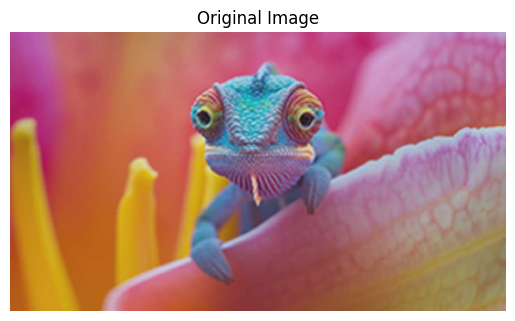

In [2]:
image = cv2.imread("/content/MainBefore.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [3]:
pixels = image.reshape((-1, 3))

In [4]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

KMeans(random_state=42)

In [5]:
new_colors = kmeans.cluster_centers_.astype("uint8")
labels = kmeans.labels_
quantized_pixels = new_colors[labels]

In [6]:
quantized_image = quantized_pixels.reshape(image.shape)

(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

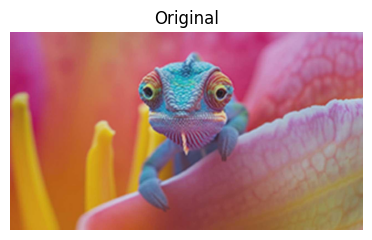

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

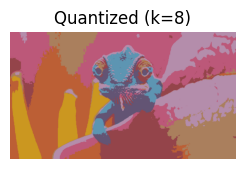

In [8]:
plt.subplot(1,2,2)
plt.imshow(quantized_image)
plt.title(f"Quantized (k={k})")
plt.axis("off")
plt.show()

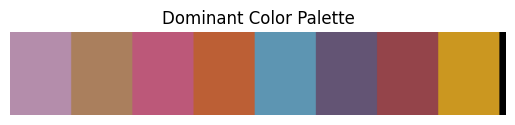

In [10]:
def plot_palette(colors):
    palette = np.zeros((50, 300, 3), dtype="uint8")
    step = 300 // len(colors)

    for i, color in enumerate(colors):
        palette[:, i*step:(i+1)*step, :] = color

    plt.imshow(palette)
    plt.title("Dominant Color Palette")
    plt.axis("off")
    plt.show()

colors = kmeans.cluster_centers_.astype("uint8")
plot_palette(colors)